<center><a href="https://ibb.co/cJD6pSW"><img src="https://i.ibb.co/y0W6Mcz/cover-depan.jpg" alt="cover-depan" border="0"></a>

# Klasifikasi Prediksi Pinjaman
Mentor: Mega Bagus Herlambang, PhD

<hr>

In [1]:
# Mengimpor library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

In [2]:
# Load dataset
df = pd.read_csv('loan_train.csv')

# Melihat dimensi df
print(df.shape)

# Melihat tampilan df
df.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Melihat summary df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
# Merubah tipe data 'Credit_History' menjadi tipe data 'object
df['Credit_History'] = df['Credit_History'].astype('O')

# Merubah kolom 'Loan_Status' menjadi angka 0 dan 1
df['Loan_Status'] = df['Loan_Status'].map({'N': 0, 'Y': 1}).astype('category')

In [5]:
# Melihat kolom kategori bertipe 'object'
kategori = [var for var in df.columns if df[var].dtype == 'O']

# Melihat tipe data kategori
print(kategori)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']


In [6]:
# Mengganti semua tipe data 'object' ke 'category'
for i in kategori:
    df[i] = df[i].astype('category')

In [7]:
# Melihat kolom df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            614 non-null    category
 1   Gender             601 non-null    category
 2   Married            611 non-null    category
 3   Dependents         599 non-null    category
 4   Education          614 non-null    category
 5   Self_Employed      582 non-null    category
 6   ApplicantIncome    614 non-null    int64   
 7   CoapplicantIncome  614 non-null    float64 
 8   LoanAmount         592 non-null    float64 
 9   Loan_Amount_Term   600 non-null    float64 
 10  Credit_History     564 non-null    category
 11  Property_Area      614 non-null    category
 12  Loan_Status        614 non-null    category
dtypes: category(9), float64(3), int64(1)
memory usage: 47.3 KB


In [8]:
# Melihat df
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [9]:
# kita buang kolom 'Loan_ID' karena tidak bermanfaat untuk model machine learning
df.drop('Loan_ID', axis=1, inplace=True)

In [10]:
# Melihat tampilan df yang baru
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [11]:
# Membagi kolom menjadi kolom numerik dan kategori
var_kategori = [var for var in df.columns if df[var].dtype == 'category' and var!='Loan_Status']
var_numerik = [var for var in df.columns if df[var].dtype!='category' and var!='Loan_Status']

# Melihat variabel yang sudah dipisah
print(var_kategori)
print(var_numerik)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


In [12]:
# Ringkasan variabel numerik
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


In [13]:
# Ringkasan variabel kategori
df.describe(include='category')

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,599,614,582,564.0,614,614
unique,2,2,4,2,2,2.0,3,2
top,Male,Yes,0,Graduate,No,1.0,Semiurban,1
freq,489,398,345,480,500,475.0,233,422


In [14]:
# Mengecek data yang terduplikasi
df.duplicated().sum()

0

In [15]:
# Mengecek data kosong
df.isnull().mean()

Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

Jumlah proporsi bernilai 1 (Y) : 0.69
Jumlah proporsi bernilai 0 (N) : 0.31


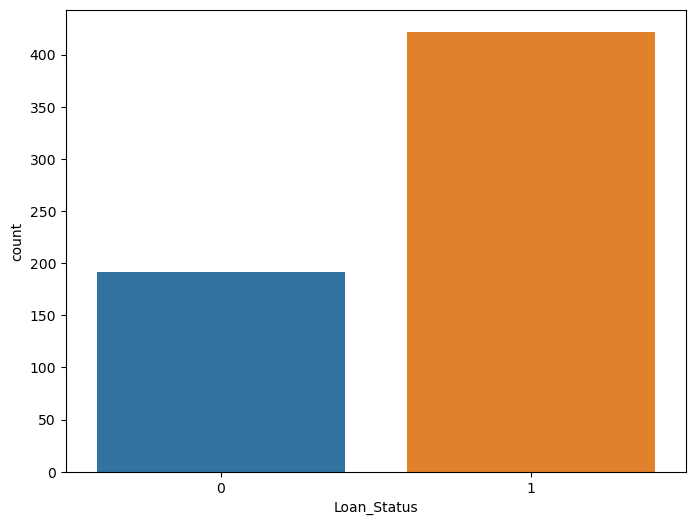

In [16]:
# Melihat proporsi kategori di label apakah balanced atau tidak
plt.figure(figsize=(8,6))
sns.countplot(x = df['Loan_Status']);

# Mencetak proporsinya
print('Jumlah proporsi bernilai 1 (Y) : %.2f' % (df['Loan_Status'].value_counts()[1] / len(df)))
print('Jumlah proporsi bernilai 0 (N) : %.2f' % (df['Loan_Status'].value_counts()[0] / len(df)))

In [17]:
# Cara lain melihat proporsi targetnya
print(df['Loan_Status'].value_counts()/len(df['Loan_Status']))

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64


Terlihat bahwa proporsinya sebenarnya tidak balanced. Kita akan imbangkan proporsinya menggunakan undersampling.

<br>

### Menentukan variabel independen (X) dan variabel dependen (y)

In [18]:
# Mendefinisikan variabel dependen (y) dan variabel independen (X)
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [19]:
# Melihat X
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [20]:
# Melihat y
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: category
Categories (2, int64): [0, 1]

<br>

### Balancing dataset

In [61]:
# Balancind dataset dengan Undersampling
ros = RandomUnderSampler(
    sampling_strategy= 'auto', # sampling minority class
    random_state= 0, # for reproducibility
    replacement=True 
)  
X_res, y_res = ros.fit_resample(X, y)

In [62]:
# Melihat proporsi yang baru
print(y_res.value_counts()/len(y_res))

0    0.5
1    0.5
Name: Loan_Status, dtype: float64


In [63]:
# Melihat dimensi data
print(X_res.shape)
print(y_res.shape)

(384, 11)
(384,)


<br>

### Splitting dataset

In [83]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(
    X_res,
    y_res,
    test_size = 0.2,
    random_state = 0)

# Melihat dimensi training set dan test set
print((X_train.shape), (X_test.shape))

(307, 11) (77, 11)


In [84]:
# Reset index X_train dan X_test
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [85]:
# Reset index y_train dan y_test
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [86]:
# Membuat Pipeline untuk preprocessing
preprocessor_numerik = Pipeline([
    ('imputasi', SimpleImputer(strategy='median')),
    ('scaling', MinMaxScaler())
])

preprocessor_kategori = Pipeline([
    ('imputasi', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('encoding', OneHotEncoder(drop='first', handle_unknown='ignore'))         
])

# Menggabungkan kedua pipeline di atas
preprocessor = ColumnTransformer([
    ('preprocessing numerik', preprocessor_numerik, var_numerik),
    ('preprocessing kategori', preprocessor_kategori, var_kategori)
])

Sebelum kita bandingkan beberapa model, kita coba buat 1 pipeline dengan salah satu model klasifikasi.

Kita coba menggunakan regresi logistik.

In [87]:
# Model regresi logistik
logreg = LogisticRegression()

# Pipeline model regresi logistik
pipe_logreg = Pipeline([
    ('preprocessing', preprocessor),
    ('logreg', logreg)
])

In [88]:
# Fitting ke training set
pipe_logreg.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('preprocessing numerik',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('preprocessing kategori',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Credit_History',
                                                   'Property_Area'])])),
                ('logreg', LogisticRegression())])

In [89]:
# Mencoba memprediksi test set
pred_test = pipe_logreg.predict(X_test)

# Merubahnya ke format Dataframe
pred_test = pd.DataFrame(pred_test, columns=['Beli'])

# Melihat tmapilan y_pred
pred_test.head()

,Beli
0,0
1,1
2,1
3,0
4,0


In [90]:
# Membuat Confusion Matrix
cm_logreg = confusion_matrix(y_test, pred_test)
cm_logreg

array([[21, 16],
       [ 6, 34]], dtype=int64)

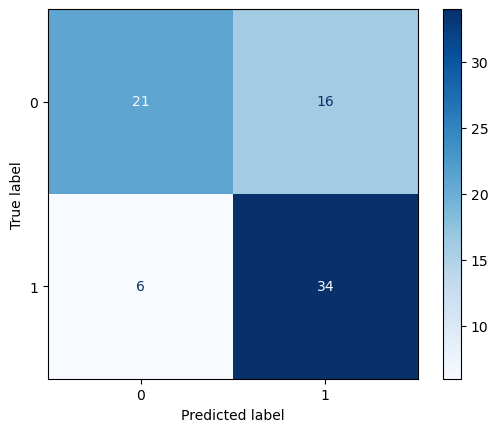

In [91]:
# Melihat confusion matrix dengan ConfusionMatrixDisplay()
vis_cm = ConfusionMatrixDisplay(confusion_matrix = cm_logreg,
                                display_labels = pipe_logreg.classes_)
vis_cm.plot(cmap=plt.cm.Blues) # cm adalah singkatan dari colormap

In [92]:
# Melihat ringkasan evaluasi
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.78      0.57      0.66        37
           1       0.68      0.85      0.76        40

    accuracy                           0.71        77
   macro avg       0.73      0.71      0.71        77
weighted avg       0.73      0.71      0.71        77



In [93]:
# Menghitung metrics klasifikasi satu per satu
print('Nilai akurasi: {:.2f}'.format(accuracy_score(y_test, pred_test)))
print('Nilai presisi: {:.2f}'.format(precision_score(y_test, pred_test)))
print('Nilai recall: {:.2f}'.format(recall_score(y_test, pred_test)))
print('Nilai f1: {:.2f}'.format(f1_score(y_test, pred_test)))

Nilai akurasi: 0.71
Nilai presisi: 0.68
Nilai recall: 0.85
Nilai f1: 0.76


Proses pembuatan pipeline berhasil dan tidak memunculkan *error* , sekarang kita akan mendefinisikan beberapa model kemudian diikuti dengan *hyperparameter tuning*.

#### 1. Logistic Regression

In [94]:
# Model regresi logistik
logreg = LogisticRegression()

# Pipeline model regresi logistik
pipe_logreg = Pipeline([
    ('preprocessing', preprocessor),
    ('logreg', logreg)
])

# Hyperparameter tuning Logistic Regression
param_logreg = {'logreg__penalty': ['l2'],
                'logreg__C': [0.01, 0.09, 0.1, 0.125, 1, 1.5],
                'logreg__solver' : ['liblinear', 'newton-cg', 'sag', 'saga', 'lbfgs']
               }

<br>

#### 2. Decision Tree

In [95]:
# Model DT
dt = DecisionTreeClassifier(random_state= 0)

# Pipeline model DT
pipe_dt = Pipeline([
    ('preprocessing', preprocessor),
    ('dt', dt)
])

# Hyperparameter tuning DT
param_dt = {'dt__min_samples_split': [2, 3, 4],
            'dt__min_samples_leaf': [1, 2, 3, 4],
            'dt__criterion': ['gini', 'entropy','log_loss'],
            'dt__max_depth':[1,2,3,4]
           }

<br>

#### 3. SVM

In [96]:
# Model SVM
svm = SVC(kernel = 'rbf', random_state = 0)

# Pipeline model SVM
pipe_svm = Pipeline([
    ('preprocessing', preprocessor),
    ('svm', svm)
])

# Hyperparameter tuning SVM
param_svm = {'svm__C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1],
             'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'svm__degree': [1, 2, 3, 4, 5],
             'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
            }

<br>

#### 4. KNN

In [97]:
# Model KNN
knn = KNeighborsClassifier()

# Pipeline model KNN
pipe_knn = Pipeline([
    ('preprocessing', preprocessor),
    ('knn', knn),
])

# Hyperparameter tuning KNN
param_knn = {'knn__n_neighbors': [1, 2, 3, 4, 5],
             'knn__weights': ['uniform', 'distance'],
             'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }

<br>

#### 5. Random Forest 

In [98]:
# Model RF
rf = RandomForestClassifier(random_state=0, n_jobs=-1)

# Pipeline model RF
pipe_rf = Pipeline([
    ('preprocessing', preprocessor),
    ('rf', rf),
])

# Hyperparameter tuning RF
param_rf = {'rf__n_estimators': [200, 250, 300],
            'rf__criterion': ['gini', 'entropy', 'log_loss'],
            'rf__max_depth': [1, 2, 3, 4],
            'rf__min_samples_split': [2, 3],
            'rf__min_samples_leaf': [1, 2, 3],
            'rf__warm_start': [True]
            }

<br>

#### 6. AdaBoost

In [99]:
# Model AdaBoost
ada = AdaBoostClassifier(random_state=0)

# Pipeline model AdaBoost
pipe_ada = Pipeline([
    ('preprocessing', preprocessor),
    ('ada', ada),
])

# Hyperparameter tuning AdaBoost
param_ada = {'ada__n_estimators': [10, 20, 30, 50, 70],
             'ada__learning_rate': [0.3, 0.4, 0.5, 1, 1.1],
             'ada__algorithm': ['SAMME', 'SAMME.R'],
             }

<br>

#### 7. Gradient Boosting

In [100]:
# Model regresi XGBoost
gb = GradientBoostingClassifier(random_state=0)

# Pipeline model regresi XGBoost
pipe_gb = Pipeline([
    ('preprocessing', preprocessor),
    ('gb',gb)
])

# Hyperparameter tuning regresi XGBoost
param_gb = {'gb__loss': ['log_loss', 'deviance', 'exponential'],
            'gb__learning_rate': [0.1, 0.3, 0.4, 0.5, 1, 1.1],
            'gb__n_estimators': [10, 20, 30, 50, 70]}

<br>

#### 8. XGBoost

In [101]:
# Model regresi LightGBM
xgb = XGBClassifier(eval_metric='logloss', random_state=0)

# pipeline model
pipe_xgb = Pipeline([
    ('preprocessing', preprocessor),
    ('xgb', xgb),
])

# hyperparameter tuning
param_xgb = {'xgb__learning_rate': [0.05, 0.1, 0.2],
             'xgb__max_depth': [5, 7, 9],
             'xgb__gamma': [0, 0.1, 0.2]
            }

<br>

## Pipeline dan Cross Validation

Sekarang saatnya melakukan model *training* dengan *cross validation*.

Daftar metrik yang bisa dipakai menggunakan perintah <code>cross_val_score()</code>:<br>
https://scikit-learn.org/stable/modules/model_evaluation.html

In [102]:
# Model training dengan cross validation
daftar_model = [pipe_logreg, pipe_dt, pipe_svm, pipe_knn, pipe_rf, pipe_ada, pipe_gb, pipe_xgb]
daftar_nama_model = ['logreg', 'dt', 'svm', 'knn', 'rf', 'ada', 'gb', 'xgb']
mean_akurasi = []
mean_auc = []
std_akurasi = []
std_auc = []
test_score_akurasi = []
test_score_auc = []

# Kita setting agar proses cross validasi dilakukan dengan sama rata (stratified) untuk pembagian kategori labelnya
skf = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
cv = skf

# Looping untuk setiap model yang sudah disiapkan 
for i in daftar_model:
    
    # Melakukan cross validation dan menggunakan kriteria berdasarkan skor akurasi
    cv_akurasi = cross_val_score(i, X_train, y_train, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)  # kita kalikan dengan -1 karena scoring menggunakan nilai negatif
    cv_auc = cross_val_score(i, X_train, y_train, cv=cv, scoring='roc_auc', verbose=1, n_jobs=-1)
    
    # Menghitung nilai rata-rata akurasi dan menambahkannya ke variabel mean_akurasi
    mean_akurasi.append(round(cv_akurasi.mean(),2))   # round(nilai,2) untuk membulatkan nilai 2 angka di belakang koma
    mean_auc.append(round(cv_auc.mean(),2))

    # Menghitung nilai standar deviasi akurasi dan menambahkannya ke variabel std_akurasi
    std_akurasi.append(round(cv_akurasi.std(),2))
    std_auc.append(round(cv_auc.std(),2))
    
    # Melakukan fitting training set kemudian melakukan prediksi  di test set
    i.fit(X_train, y_train)
    i_predict = i.predict(X_test)
    
    # Menghitung nilai rata-rata akurasi di test set dan menambahkannya ke variabel test_score_akurasi
    test_score_akurasi.append(round(accuracy_score(y_test, i_predict),2))
    test_score_auc.append(round(roc_auc_score(y_test, i_predict),2))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3

In [103]:
# Membuat DataFrame
cv_akurasi = pd.DataFrame({'model':daftar_nama_model, 'Train_Mean':mean_akurasi, 'std':std_akurasi, 'Test_Score':test_score_akurasi})
cv_auc = pd.DataFrame({'model':daftar_nama_model, 'Train_Mean':mean_auc, 'std':std_auc, 'Test_Score':test_score_auc})

In [104]:
# Melihat hasil cross validation berdasarkan akurasi
cv_akurasi

,model,Train_Mean,std,Test_Score
0,logreg,0.67,0.02,0.71
1,dt,0.70,0.02,0.68
2,svm,0.67,0.00,0.73
3,knn,0.67,0.03,0.61
4,rf,0.75,0.02,0.75
5,ada,0.69,0.01,0.74
6,gb,0.70,0.03,0.77
7,xgb,0.71,0.05,0.77


In [105]:
# Melihat hasil cross validation berdasarkan akurasi
cv_auc

,model,Train_Mean,std,Test_Score
0,logreg,0.76,0.02,0.71
1,dt,0.70,0.02,0.67
2,svm,0.74,0.03,0.72
3,knn,0.73,0.03,0.61
4,rf,0.82,0.03,0.75
5,ada,0.72,0.04,0.74
6,gb,0.76,0.05,0.76
7,xgb,0.76,0.03,0.76


In [106]:
# Mengurutkan skor dari kecil ke besar berdasarkan skor akurasi
cv_akurasi_urut = cv_akurasi.sort_values(by=['Train_Mean', 'Test_Score'], ascending=False,  ignore_index=True)
cv_akurasi_urut

,model,Train_Mean,std,Test_Score
0,rf,0.75,0.02,0.75
1,xgb,0.71,0.05,0.77
2,gb,0.70,0.03,0.77
3,dt,0.70,0.02,0.68
4,ada,0.69,0.01,0.74
5,svm,0.67,0.00,0.73
6,logreg,0.67,0.02,0.71
7,knn,0.67,0.03,0.61


In [107]:
# Mengurutkan skor dari kecil ke besar berdasarkan skor AUC
cv_auc_urut = cv_auc.sort_values(by=['Train_Mean', 'Test_Score'], ascending=False,  ignore_index=True)
cv_auc_urut

,model,Train_Mean,std,Test_Score
0,rf,0.82,0.03,0.75
1,gb,0.76,0.05,0.76
2,xgb,0.76,0.03,0.76
3,logreg,0.76,0.02,0.71
4,svm,0.74,0.03,0.72
5,knn,0.73,0.03,0.61
6,ada,0.72,0.04,0.74
7,dt,0.70,0.02,0.67


<br>

## Hyperparameter Tuning

Kita sudah melihat bahwa model gb yang terbaik dibanding semua model, berdasarkan skor akurasi yang tinggi dan skor auc yang tinggi pula.

Namun semua model yang dibandingkan menggunakan *hyperparameter* default. 

Kita akan coba membandingkan kembali semua model tersebut dengan *setting*an *hyperparameter* yang sudah kita *tuning* dengan menggunakan <code>GridSearchCV()</code>.

<code>GridSearchCV()</code> akan mengevaluasi semua settingan dari *hyperparameter* yang sudah disiapkan dan mempertahankan *setting*-an terbaik sampai selesai (setelah mencoba semua kombinasi *hyperparameter* dan semua *fold* di *cross validation*).

In [108]:
# Model training dengan GridSearchCV
daftar_model = [pipe_logreg, pipe_dt, pipe_svm, pipe_knn, pipe_rf, pipe_ada, pipe_gb, pipe_xgb]
daftar_nama_model = ['logreg', 'dt', 'svm', 'knn', 'rf', 'ada', 'gb', 'xgb']
daftar_param_model = [param_logreg, param_dt, param_svm, param_knn, 
                      param_rf, param_ada, param_gb, param_xgb]

# Nilai yang akan diisikan
akurasi_tuning = []
akurasi_tuning_test = []
auc_tuning = []
auc_tuning_test = []
best_param = []
best_estimator = []

for i in range(len(daftar_model)):
    
    # Menjalankan GridSearchCV
    model_grid_cv = GridSearchCV(
        daftar_model[i],
        daftar_param_model[i],
        cv=5,
        scoring='accuracy',  # nilai akurasi digunakan sebagai dasar penentuan peringkat parameter terbaik dan parameter scoring ini bisa diganti yang lain
        verbose=1,
        n_jobs=-1
        )
    
    # Fitting ke training set
    model_grid_cv.fit(X_train,y_train)
    
    # Mencoba memprediksi training dan test set setelah fitting di training set, kemudian dikemas dalam format DataFrame
    pred_train = pd.DataFrame(model_grid_cv.predict(X_train), columns=['Beli'])
    pred_test = pd.DataFrame(model_grid_cv.predict(X_test), columns=['Beli'])

    # Mencatat skor MAE training dan test set
    akurasi_tuning.append(accuracy_score(y_train, pred_train))
    akurasi_tuning_test.append(accuracy_score(y_test, pred_test))

    # Mencatat skor R2 training dan test set
    auc_tuning.append(roc_auc_score(y_train, pred_train))
    auc_tuning_test.append(roc_auc_score(y_test, pred_test))   
    
    # Mencatat parameter terbaik di setiap model
    best_param.append(model_grid_cv.best_params_)
    
    # Merekam settingan modelnya
    best_estimator.append(model_grid_cv.best_estimator_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 700 candidates, totalling 3500 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [109]:
# Membuat DataFrame sekaligus kita urutkan
grid_akurasi = pd.DataFrame({'model':daftar_nama_model, 'Training':akurasi_tuning, 'Testing':akurasi_tuning_test})
grid_akurasi_urut = grid_akurasi.sort_values(by='Testing', ascending=False,  ignore_index=True)

grid_auc = pd.DataFrame({'model':daftar_nama_model, 'Training':auc_tuning, 'Testing':auc_tuning_test})
grid_auc_urut = grid_auc.sort_values(by='Testing', ascending=False, ignore_index=True)

Kita pilih model terbaik berdasarkan performanya di *Test Set*.

In [110]:
# Melihat performa tuning berdasarkan MAE
grid_akurasi_urut

,model,Training,Testing
0,gb,1.000000,0.792208
1,xgb,1.000000,0.766234
2,logreg,0.684039,0.753247
3,dt,0.690554,0.740260
4,svm,0.710098,0.740260
5,rf,0.788274,0.727273
6,ada,0.814332,0.727273
7,knn,1.000000,0.662338


Perlu diperhatikan bahwa skor akurasi di kolom *Training* di atas adalah skor akurasi rata-rata dari *cross validation*. Begitu juga untuk nilai akurasi di kolom *Testing*.

In [111]:
# Melihat performa tuning berdasarkan R2
grid_auc_urut

,model,Training,Testing
0,gb,1.000000,0.789865
1,xgb,1.000000,0.764865
2,logreg,0.686651,0.744257
3,svm,0.712521,0.731757
4,dt,0.693294,0.730743
5,ada,0.815238,0.724324
6,rf,0.790004,0.721284
7,knn,1.000000,0.661824


Dari model di atas dapat kita lihat bahwa model terbaik adalah menggunakan AdaBoost.

Sekarang kita bisa menyimpam parameter dan estimator dari setiap model dalam format DataFrame.

In [112]:
# Parameter terbaik dari model terbaik
grid_param = pd.DataFrame({'model':daftar_nama_model, 'Param':best_param})
grid_param

,model,Param
0,logreg,"{'logreg__C': 0.01, 'logreg__penalty': 'l2', '..."
1,dt,"{'dt__criterion': 'gini', 'dt__max_depth': 1, ..."
2,svm,"{'svm__C': 1, 'svm__degree': 2, 'svm__gamma': ..."
3,knn,"{'knn__algorithm': 'auto', 'knn__n_neighbors':..."
4,rf,"{'rf__criterion': 'entropy', 'rf__max_depth': ..."
5,ada,"{'ada__algorithm': 'SAMME.R', 'ada__learning_r..."
6,gb,"{'gb__learning_rate': 1.1, 'gb__loss': 'expone..."
7,xgb,"{'xgb__gamma': 0, 'xgb__learning_rate': 0.2, '..."


In [113]:
# Estimator terbaik dari model terbaik
grid_estimator = pd.DataFrame({'model':daftar_nama_model, 'Param':best_estimator})
grid_estimator

,model,Param
0,logreg,(ColumnTransformer(transformers=[('preprocessi...
1,dt,(ColumnTransformer(transformers=[('preprocessi...
2,svm,(ColumnTransformer(transformers=[('preprocessi...
3,knn,(ColumnTransformer(transformers=[('preprocessi...
4,rf,(ColumnTransformer(transformers=[('preprocessi...
5,ada,(ColumnTransformer(transformers=[('preprocessi...
6,gb,(ColumnTransformer(transformers=[('preprocessi...
7,xgb,(ColumnTransformer(transformers=[('preprocessi...


In [115]:
# Parameter terbaik GradientBoosting --> indeks ke 6
grid_param['Param'][6]

{'gb__learning_rate': 1.1, 'gb__loss': 'exponential', 'gb__n_estimators': 50}

In [117]:
# Estimator terbaik GradientBoosting --> indeks ke 5
grid_estimator['Param'][6]

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('preprocessing numerik',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('preprocessing kategori',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Credit_History',
                                                   'Property_Area'])])),
                ('gb',
                 GradientBoostingClassifier(learning_rate=1.1,
                                            loss='exponential', n_estimators=50,
                                            random_state=0))])

In [118]:
# Kita gabungkan semua sebagai 'model_best'
model_best = pd.DataFrame({'model':daftar_nama_model, 'Param':best_estimator, 'Testing':akurasi_tuning_test})
model_best = model_best.sort_values(by='Testing', ascending=False, ignore_index=True)
model_best

,model,Param,Testing
0,gb,(ColumnTransformer(transformers=[('preprocessi...,0.792208
1,xgb,(ColumnTransformer(transformers=[('preprocessi...,0.766234
2,logreg,(ColumnTransformer(transformers=[('preprocessi...,0.753247
3,dt,(ColumnTransformer(transformers=[('preprocessi...,0.740260
4,svm,(ColumnTransformer(transformers=[('preprocessi...,0.740260
5,rf,(ColumnTransformer(transformers=[('preprocessi...,0.727273
6,ada,(ColumnTransformer(transformers=[('preprocessi...,0.727273
7,knn,(ColumnTransformer(transformers=[('preprocessi...,0.662338


<br>

#### Menggunakan Model Terbaik

Sekarang kita bisa menggunakan modelnya dari <code>model_best</code>, di mana jika kita ingin memilih model terbaik maka pilih urutan pertama.

Sehingga jika kita ingin menggunakan *Random Forest*, maka pilih <code>model_best['Param'][0]</code>.

Sekarang kita harus melakukan *fitting* akhir di mana kita akan mentraining parameter dari model terbaik terhadap dataset utuh (gabungan *training set* dan *test set*).

In [170]:
# Fitting ke dataset utuh
model_final = model_best['Param'][0].fit(X_res, y_res)

Sekarang kita memiliki model akhir (`model_final`) yang sudah di*fitting* ke dataset utuh. 

Kita coba gunakan model akhir ini untuk memprediksi X_train dan X_test.

In [171]:
# Melihat spesifikasi model_final
model_final

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('preprocessing numerik',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('preprocessing kategori',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Credit_History',
                                                   'Property_Area'])])),
                ('gb',
                 GradientBoostingClassifier(learning_rate=1.1,
                                            loss='exponential', n_estimators=50,
                                            random_state=0))])

In [172]:
# Load data loan_test.csv
df_test = pd.read_csv('loan_test.csv')
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [179]:
df_test['Credit_History'] = df_test['Credit_History'].astype('category')

In [180]:
# Memprediksi df_test
hasil = model_final.predict(df_test)
hasil

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,

In [181]:
# Keputusan
for i in range(len(hasil)):
    if hasil[i] == 1:
        print('Data pelanggan',df_test['Loan_ID'][i],'= Approved')
    else:
        print('Data pelanggan',df_test['Loan_ID'][i],'= Reject')

Data pelanggan LP001015 = Approved
Data pelanggan LP001022 = Approved
Data pelanggan LP001031 = Approved
Data pelanggan LP001035 = Approved
Data pelanggan LP001051 = Reject
Data pelanggan LP001054 = Approved
Data pelanggan LP001055 = Approved
Data pelanggan LP001056 = Reject
Data pelanggan LP001059 = Reject
Data pelanggan LP001067 = Approved
Data pelanggan LP001078 = Reject
Data pelanggan LP001082 = Reject
Data pelanggan LP001083 = Approved
Data pelanggan LP001094 = Reject
Data pelanggan LP001096 = Approved
Data pelanggan LP001099 = Approved
Data pelanggan LP001105 = Reject
Data pelanggan LP001107 = Approved
Data pelanggan LP001108 = Approved
Data pelanggan LP001115 = Approved
Data pelanggan LP001121 = Reject
Data pelanggan LP001124 = Reject
Data pelanggan LP001128 = Reject
Data pelanggan LP001135 = Reject
Data pelanggan LP001149 = Reject
Data pelanggan LP001153 = Reject
Data pelanggan LP001163 = Approved
Data pelanggan LP001169 = Approved
Data pelanggan LP001174 = Approved
Data pelang

<br>

#### Menyimpan Model

Sekarang kita akan menyimpan modelnya untuk nanti bisa dipakai dan di*deploy*.

In [175]:
# Library untuk menyimpan model
import pickle

In [182]:
# Menyimpan model dengan nama 'model_regresi_terbaik.pkl'
pickle.dump(model_final, open('model_klasifikasi_loan.pkl', 'wb'))

Sekarang kita akan coba memprediksi X_test menggunakan model yang sudah kita simpan.

In [183]:
# Load lagi model yang sudah disimpan dan buka sebagai 'best_model'
best_model = pickle.load(open('model_klasifikasi_loan.pkl', 'rb'))

In [184]:
# Mencoba melakukan prediksi X_test
prediksi = best_model.predict(df_test)

# Melihat hasil prediksi
prediksi

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,

In [168]:
# Merubah dalam format DataFrame
prediksi = pd.DataFrame(prediksi, columns=['Loan_Status'])
prediksi.head()

,Loan_Status
0,1
1,1
2,1
3,1
4,0
